In [18]:
import torch
import numpy as np
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
x = torch.linspace(0,499, steps=500)
y = torch.sin(x*2*3.1446/30) + 0.05*torch.randn(500)

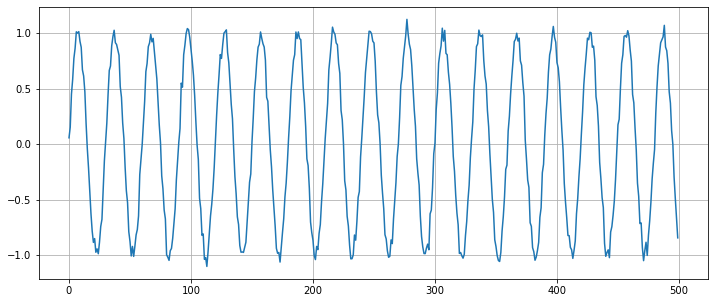

In [20]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(x,y)

In [21]:
test_size = 30
train_original_data = y[:-test_size]
test_original_data = y[-test_size:]

In [22]:
def sequence_creator(input_data, window):
    dataset = []
    data_len = len(input_data)
    for i in range(data_len - window):
        window_fr = input_data[i:i+window]
        label = input_data[i+window:i+window+1]
        dataset.append((window_fr, label))
    return dataset

In [23]:
window_size = 30
train_data = sequence_creator(train_original_data, window_size)

In [24]:
for tmp_sequence_in, tmp_y_rain in train_data:
    print(tmp_sequence_in, tmp_y_rain)
    break

tensor([ 0.0579,  0.1534,  0.4507,  0.5843,  0.7733,  0.8646,  1.0124,  1.0007,
         1.0140,  0.9264,  0.8734,  0.6703,  0.6144,  0.4712,  0.1869, -0.0394,
        -0.2137, -0.4256, -0.6258, -0.7822, -0.8842, -0.8498, -0.9732, -0.9426,
        -0.9864, -0.8814, -0.7409, -0.6769, -0.4087, -0.1480]) tensor([0.0268])


In [30]:
class LSTM_Model(nn.Module):
    def __init__(self, in_size=1, h_size=50, out_size=1):
        super().__init__()
        
        self.h_size = h_size
        self.lstm = nn.LSTM(in_size, h_size)
        self.fc = nn.Linear(h_size, out_size)
        
        self.hidden = (torch.zeros(1,1,h_size), torch.zeros(1,1,h_size))
        
    def forward(self, sequence_data):
        lstm_out, self.hidden = self.lstm(sequence_data.view(len(sequence_data), 1, 1), self.hidden)
        pred = self.fc(lstm_out.view(len(sequence_data), -1))
        
        return pred[-1]

In [31]:
torch.manual_seed(3)
model = LSTM_Model()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model

LSTM_Model(
  (lstm): LSTM(1, 50)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [33]:
epochs = 10
test = 30
loss_list = []
for epoch in range(epochs):
    for sequence_in, y_train in train_data:
        y_pred = model(sequence_in)
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.h_size),torch.zeros(1,1,model.h_size))
        
        loss.backward()
        optimizer.step()
        
    loss_list.append(loss)
    print(f'Epoch {epoch+1}  Loss {loss.item(): .3f}')

Epoch 1  Loss  0.129
Epoch 2  Loss  0.050
Epoch 3  Loss  0.018
Epoch 4  Loss  0.000
Epoch 5  Loss  0.010
Epoch 6  Loss  0.021
Epoch 7  Loss  0.024
Epoch 8  Loss  0.024
Epoch 9  Loss  0.024
Epoch 10  Loss  0.024


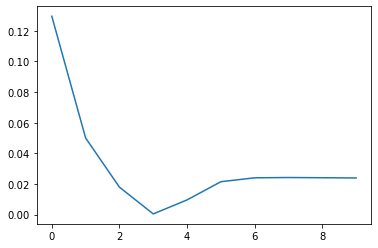

In [34]:
plt.plot(loss_list)

In [37]:
predict_list = []
predict_list = train_original_data[-window_size:].tolist()

model.eval()

LSTM_Model(
  (lstm): LSTM(1, 50)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [42]:
for i in range(test_size):
    sequence_in = torch.FloatTensor(predict_list[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.h_size),torch.zeros(1,1,model.h_size))
        predict_list.append(model(sequence_in).item())
        
loss = criterion(torch.tensor(predict_list[-window_size:]), y[470:])
print(f'Loss {loss.item(): .3f}')

Loss  0.172


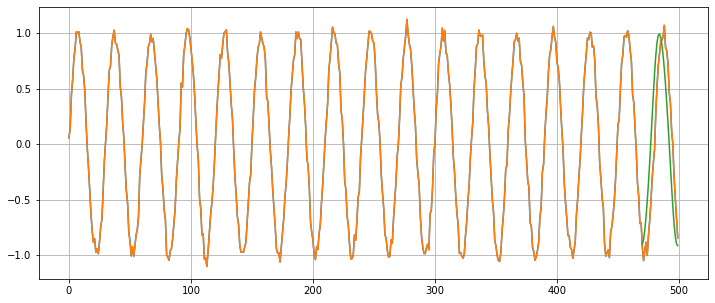

In [44]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(y.numpy())
plt.plot(y.numpy())
plt.plot(range(470,500), predict_list[-window_size:])
plt.show()

In [45]:
epochs = 5
window_size = 30
unknow = 30

full_data = sequence_creator(y, window_size)
model.train()

LSTM_Model(
  (lstm): LSTM(1, 50)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

In [46]:
for epoch in range(epochs):
    for sequence_in, y_train in full_data:
        y_pred = model(sequence_in)
        loss = criterion(y_pred, y_train)
        
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.h_size), torch.zeros(1,1,model.h_size))
        
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch+1} Loss {loss.item(): .3f}')

Epoch 1 Loss  0.000
Epoch 2 Loss  0.000
Epoch 3 Loss  0.000
Epoch 4 Loss  0.000
Epoch 5 Loss  0.000


In [47]:
predict_list = y[-window_size:].tolist()
model.eval()
for i in range(unknow):
    sequence = torch.FloatTensor(predict_list[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.h_size),torch.zeros(1,1,model.h_size))
        predict_list.append(model(sequence).item())

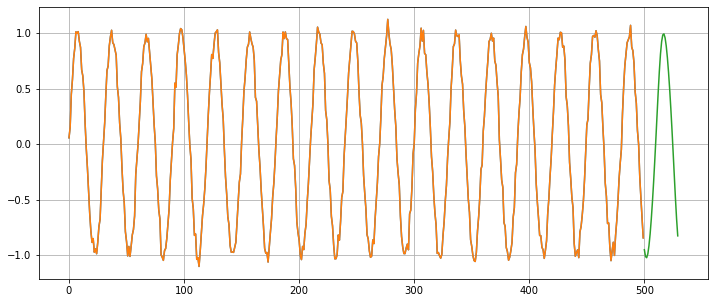

In [48]:
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(y.numpy())
plt.plot(y.numpy())
plt.plot(range(500,500+unknow), predict_list[-window_size:])
plt.show()